In [1]:
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 100  # make plots bigger
import numpy as np
import pickle as pkl
import pandas as pd

In [21]:
def preprocess(pth,colname='radius'):
    """ remove abstains, sort by l2 radius, and calculate the certified percent correct """
    
    # import the pkl dataframe
    with open(pth, 'rb') as f:
        df = pkl.load(f)
    
    # remove any abstains (see Salmon's paper)
    df = df[df[colname]>0]
    #df = df.dropna()
    
    # sort by radius
    df = df.sort_values(by=[colname])
    
    # get certified accuracy
    n = len(df[colname])
    pct_corr = np.zeros(n)
    i = 0
    for r in df[colname]:
        cond1 = df[colname] > r
        cond2 = df['correct'] == 1
        cond = cond1&cond2
        pct = cond.astype(int).sum()/n
        pct_corr[i] = pct
        i += 1
    df['cert_acc'] = 100*pct_corr
    
    #print(df['cert_acc'])
    
    return df

In [22]:
# Radius of zero implies at a given image, we abstain from certifying due to lack of condifence
# i.e., Pr(C(x)==C(x+noise)) < 0.5

data = preprocess(pth="PATH TO CERTIFICATION DATA")
#KLdata = preprocess(pth='./cifar10-certify/kl2.pkl')
#Cohendata = preprocess(pth='./cifar10-certify/cohen2.pkl')
#Salmandata = preprocess(pth='./cifar10-certify/salman.pkl')
#JLdata = preprocess(pth='./cifar10-certify/jl2.pkl')

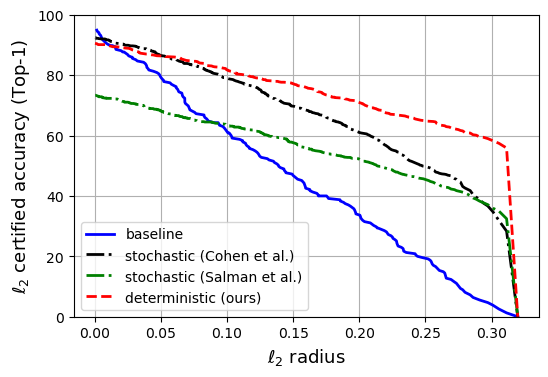

In [23]:
plt.plot(data['radius'],data['cert_acc'],label="",linewidth=2)
#plt.plot(KLdata['radius'], KLdata['cert_acc'], 'b-', label='baseline', linewidth=2)
#plt.plot(Cohendata['radius'], Cohendata['cert_acc'], 'k-.', label='stochastic (Cohen et al.)', linewidth=2)
#plt.plot(Salmandata['radius'], Salmandata['cert_acc'], 'g-.', label='stochastic (Salman et al.)', linewidth=2)
#plt.plot(JLdata['radius'], JLdata['cert_acc'], 'r--', label='deterministic (ours)', linewidth=2)

plt.grid(True)
plt.ylim(0,100)
plt.legend(prop={'size': 10})
plt.xlabel("$\ell_2$ radius", fontsize=13)
plt.ylabel("$\ell_2$ certified accuracy (Top-1)", fontsize=13)
plt.savefig('./cifar10-certify/certplot.png',bbox_inches='tight')
plt.show()